In [2]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [3]:
# Reading the data
data = pd.read_csv("Insurance (1).csv") 
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Basic Data checks and Data cleaning

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:

data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


<AxesSubplot:>

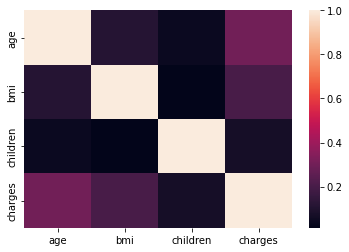

In [8]:
cor= data.corr()
sns.heatmap(cor)

In [9]:
# Replacing categorical values with Numerical values
data['smoker'] = data['smoker'].replace('yes',1)
data['smoker'] = data['smoker'].replace('no',0)
data['sex'] = data['sex'].replace('female',1)
data['sex'] = data['smoker'].replace('male',0)

In [10]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [11]:
data.drop(columns= ['region'], inplace=True)

In [12]:
data.head()

,age,sex,bmi,children,smoker,charges
0,19,1,27.900,0,1,16884.92400
1,18,0,33.770,1,0,1725.55230
2,28,0,33.000,3,0,4449.46200
3,33,0,22.705,0,0,21984.47061
4,32,0,28.880,0,0,3866.85520


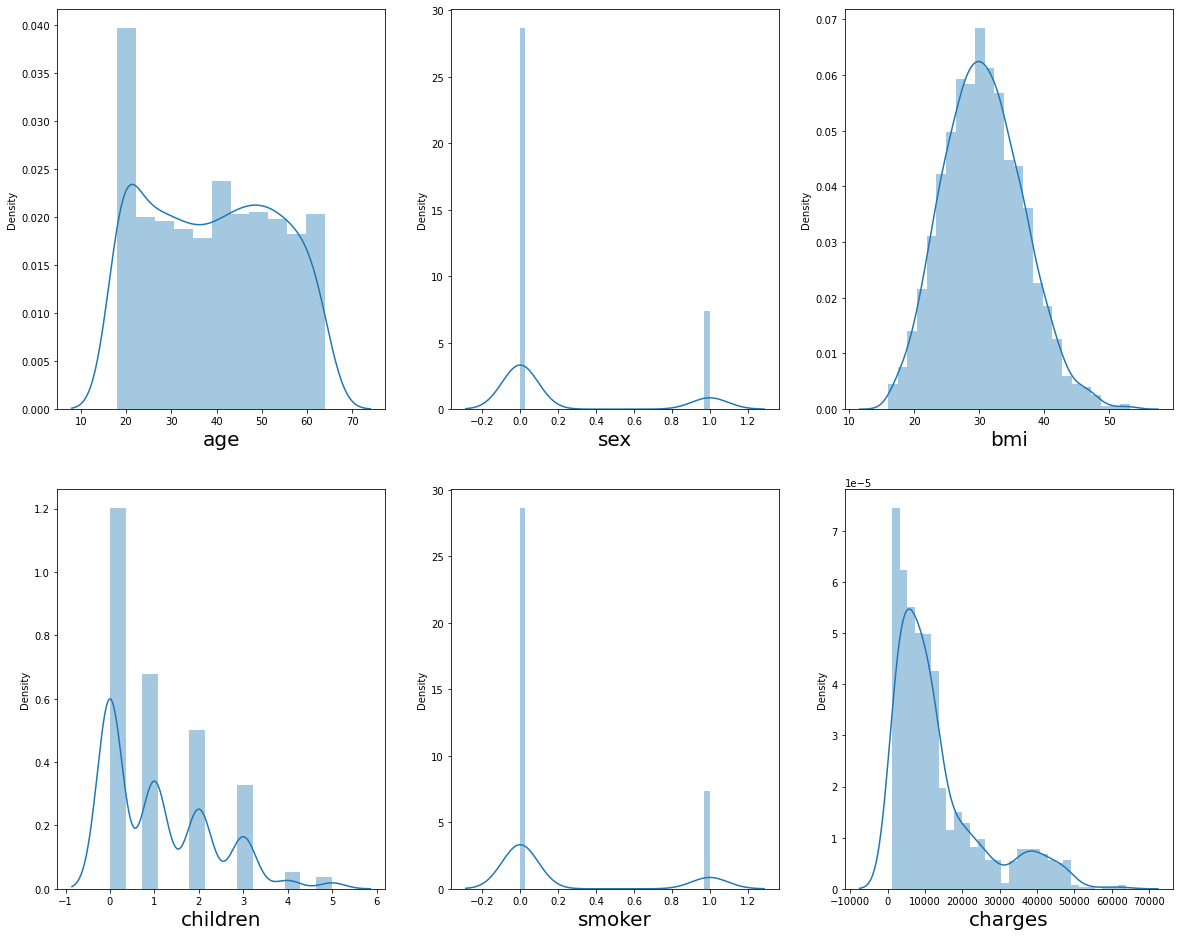

In [13]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    
    plotnumber+=1
plt.show()

In [14]:
### Split X and Y
X = data.drop(columns = ['charges'])
Y = data['charges']

In [15]:
## scaling the data
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [16]:
X_scaled

array([[-1.43876426,  1.97058663, -0.45332   , -0.90861367,  1.97058663],
       [-1.50996545, -0.5074631 ,  0.5096211 , -0.07876719, -0.5074631 ],
       [-0.79795355, -0.5074631 ,  0.38330685,  1.58092576, -0.5074631 ],
       ...,
       [-1.50996545, -0.5074631 ,  1.0148781 , -0.90861367, -0.5074631 ],
       [-1.29636188, -0.5074631 , -0.79781341, -0.90861367, -0.5074631 ],
       [ 1.55168573,  1.97058663, -0.26138796, -0.90861367,  1.97058663]])

In [17]:
## splitting the training and testing data
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,random_state=42)

In [18]:
## Error calculation for regression task
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

rmse_val = [] #create list to store rmse values for different k
for K in range(20):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, Y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = np.sqrt(mean_squared_error(Y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 6317.526483427458
RMSE value for k=  2 is: 5421.004477790054
RMSE value for k=  3 is: 5141.254930097425
RMSE value for k=  4 is: 4848.25286640841
RMSE value for k=  5 is: 4726.503998771888
RMSE value for k=  6 is: 4633.623949894531
RMSE value for k=  7 is: 4729.242839967398
RMSE value for k=  8 is: 4670.219803330426
RMSE value for k=  9 is: 4709.3789125459825
RMSE value for k=  10 is: 4720.451451911443
RMSE value for k=  11 is: 4706.114884523125
RMSE value for k=  12 is: 4697.928257828297
RMSE value for k=  13 is: 4700.399393631917
RMSE value for k=  14 is: 4675.625014451604
RMSE value for k=  15 is: 4621.675701642856
RMSE value for k=  16 is: 4612.499882157244
RMSE value for k=  17 is: 4634.478206687746
RMSE value for k=  18 is: 4613.06247618813
RMSE value for k=  19 is: 4608.272059697579
RMSE value for k=  20 is: 4597.739479512494


In [23]:
# let's fit the data into KNN model and see how well it performs:
knn = KNeighborsRegressor(n_neighbors=20)
knn.fit(X_train,Y_train)# Predict 
Y_pred = knn.predict(X_test)

In [24]:
Y_pred

array([ 9778.0109595,  5525.8448275, 32585.732062 ,  9855.086059 ,
       29455.0177365,  5828.419532 ,  3001.5213545, 13529.5078675,
        3620.9946895, 12084.215272 , 21727.021167 ,  8822.2299735,
        5685.315835 , 44364.772956 , 46211.07638  , 44493.9471785,
       10590.657901 , 43092.4922755, 10057.285355 , 25388.7480315,
        7588.548442 , 11206.516667 ,  3659.3778205,  2487.2814   ,
       12131.8374745, 12283.717019 , 13268.9839725,  6119.253243 ,
       11169.4871155,  3635.418478 ,  7779.5208075, 12391.291981 ,
        2716.1098515,  6320.3407625,  5648.2708335,  8315.069461 ,
        4832.3938755,  8171.211745 , 24648.6395845, 40957.9942505,
        8220.4173365,  6262.020562 , 14420.403321 , 13632.894564 ,
        8196.8041045, 15676.06529  ,  6480.3443885,  7629.1828615,
       41959.918533 ,  7688.3023565, 13473.1487875,  5221.2736355,
        7475.8342445,  1868.892965 , 11917.461878 , 12243.199289 ,
        3701.5104225, 36679.241995 , 12133.66548  , 11700.9361